In [8]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
import os

## Perception

First, to read in an image, I ran the simulator which saved a bunch of images into `IMG`

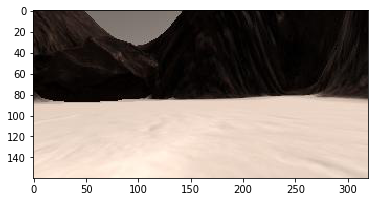

In [118]:
# Define the filename, read and plot the image
filename = 'IMG/' + os.listdir("IMG")[0]
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

then use [numpy for image ops](http://scikit-image.org/docs/dev/user_guide/numpy_images.html):

In [26]:
print(image.dtype, image.shape, np.min(image), np.max(image))
# uint8 (160, 320, 3) 0 255

uint8 (160, 320, 3) 0 255


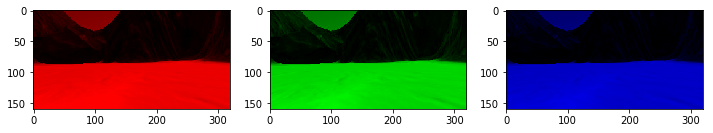

In [33]:
# Note: we use the np.copy() function rather than just saying red_channel = image
# because in Python, such a statement would set those two arrays equal to each other
# forever, meaning any changes made to one would also be made to the other!
red_channel = np.copy(image)
# Note: here instead of extracting individual channels from the image
# I'll keep all 3 color channels in each case but set the ones I'm not interested 
# in to zero.  
red_channel[:,:,[1, 2]] = 0 # Zero out the green and blue channels`

green_channel = np.copy(image)
green_channel[:,:,[0, 2]] = 0 # Zero out the red and blue channels

blue_channel = np.copy(image)
blue_channel[:,:,[0, 1]] = 0 # Zero out the red and green channels

fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
plt.subplot(131) # Initialize subplot number 1 in a figure that is 3 columns 1 row
plt.imshow(red_channel) # Plot the red channel
plt.subplot(132) # Initialize subplot number 2 in a figure that is 3 columns 1 row
plt.imshow(green_channel)  # Plot the green channel
plt.subplot(133) # Initialize subplot number 3 in a figure that is 3 columns 1 row
plt.imshow(blue_channel)  # Plot the blue channel
plt.show()

In [117]:
a = np.random.randint(0, 5, [3,8])
b = np.random.randint(0, 5, [3,8])
print(a)
a[np.ma.make_mask(b)] = 1

a
mask = np.ma.make_mask(b)
print(mask)
a[mask] = 99
a

[[3 0 3 0 1 3 1 2]
 [2 1 2 2 1 4 1 2]
 [3 4 2 0 3 4 2 0]]
[[ True  True False  True False  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]


array([[99, 99,  3, 99,  1, 99, 99, 99],
       [99, 99, 99, 99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99, 99, 99, 99]])

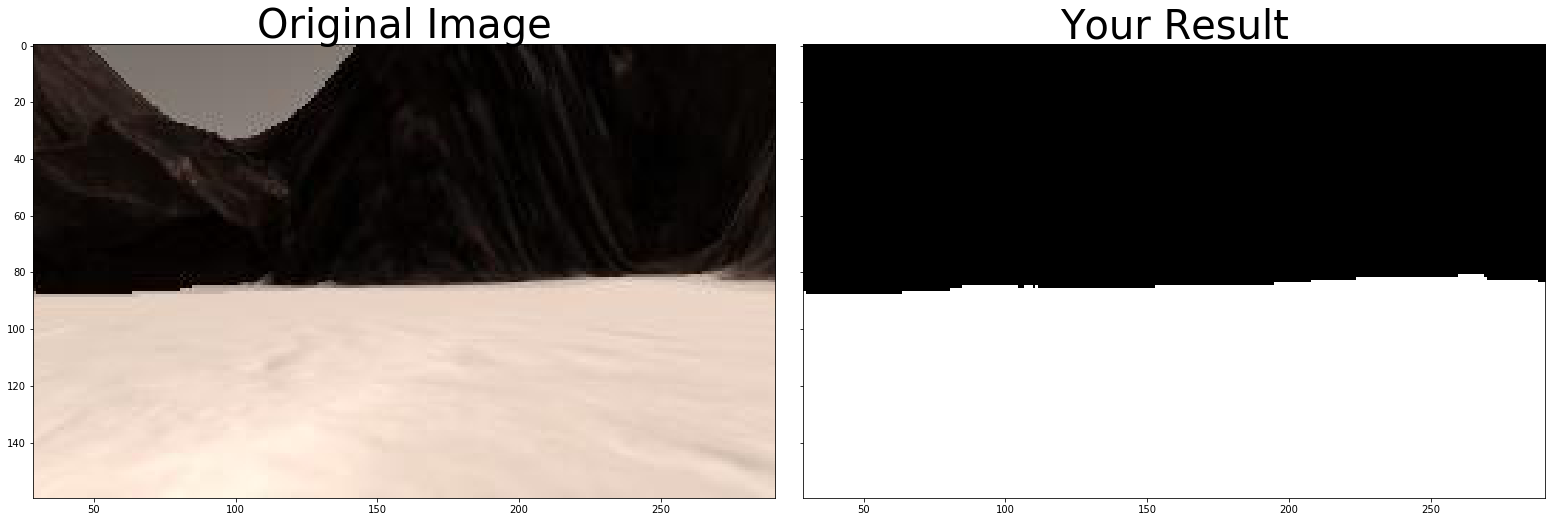

In [150]:
# Define a function to perform a color threshold
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    ###### TODO:
    # Create an empty array the same size in x and y as the image 
    # but just a single channel
    color_select = np.zeros_like(img[:,:,0])
    # Apply the thresholds for RGB and assign 1's 
    # where threshold was exceeded
    # Return the single-channel binary image
    
    # make color_select=1  where rgb value exceeds threshold
    for i, _ in enumerate("rgb"):
        color_select[image[:,:,i] > rgb_thresh[i]] = 1

    return color_select
    
# Define color selection criteria
###### TODO: MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 160
green_threshold = 160
blue_threshold = 160
######
rgb_threshold = (red_threshold, green_threshold, blue_threshold)

# pixels below the thresholds
colorsel = color_thresh(image, rgb_thresh=rgb_threshold)

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Your Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show() # Uncomment if running on your local machine

## Perspective Transform

image shape:  (160, 320, 3)


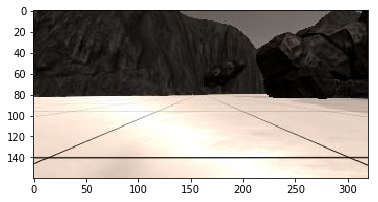

In [190]:
import cv2
%matplotlib inline
image = mpimg.imread('images/example_grid1.jpg')
print("image shape: ", image.shape)
plt.imshow(image)
plt.show()

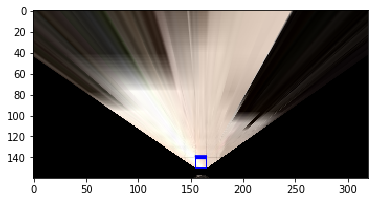

In [194]:
def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# Define source and destination points
source = np.float32([[14,140], [300,140], [200, 96], [120, 96]])

height, width, _ = image.shape
# we want 10x10 square in the middle, just of the bottom
mid = width / 2 # the middle of the image, width wise
# unlike a normal axis, the values are top to bottom for the height
btm = height - 10 # get the bottom of the image and subtract an offset
destination = np.float32([[mid-5 ,btm], [mid+5 ,btm], [mid+5 , btm-10], [mid-5 ,btm-10]])

warped = perspect_transform(image, source, destination)
plt.imshow(warped)
plt.show()

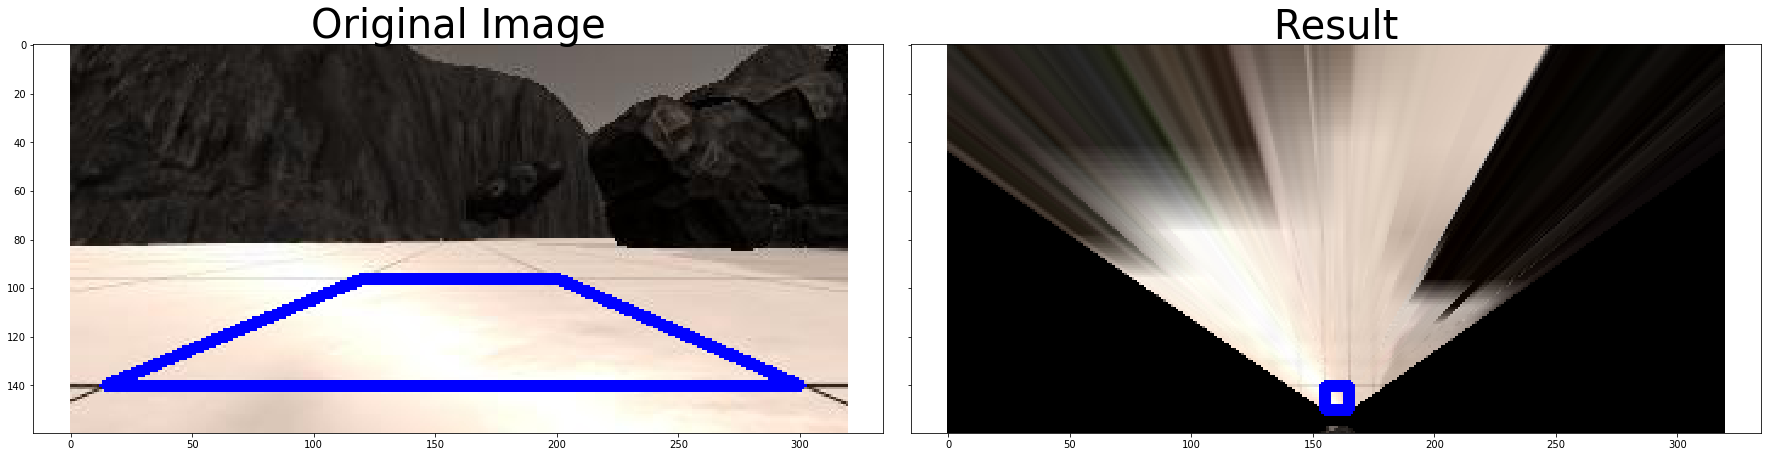

In [195]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image = mpimg.imread('images/example_grid1.jpg')

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# TODO:
# Define a box in source (original) and 
# destination (desired) coordinates
# Try experimenting with different values!

# as eyeballed by me
source = np.float32([[14,140], [300,140], [200, 96], [120, 96]])

height, width, _ = image.shape
# we want 10x10 square in the middle, just of the bottom
mid = width / 2 # the middle of the image, width wise
btm = height - 10 # get the bottom of the image and subtract an offset
destination = np.float32([[mid-5 ,btm], [mid+5 ,btm], [mid+5 , btm-10], [mid-5 ,btm-10]])

warped = perspect_transform(image, source, destination)
# Draw Source and destination points on images (in blue) before plotting
cv2.polylines(image, np.int32([source]), True, (0, 0, 255), 3)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 3)
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.show() # Uncomment if running on your local machine